In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import matplotlib.pyplot as plt
#importing libraries

In [2]:
data= pd.read_csv('C:/Users/Sadneya/Downloads/sales.csv') #import dataset
data.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [3]:
#convert to dataframe
df = pd.DataFrame(data)

In [9]:
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [4]:
# Exploring the columns of the data 
df.columns 

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [5]:
# Exploring the different regions of transactions 
df.State.unique() 

array(['Connecticut', 'Washington', 'California', 'Texas', 'New York',
       'Ohio', 'Illinois', 'Louisiana', 'Florida', 'Wisconsin',
       'Colorado', 'Missouri', 'Iowa', 'Massachusetts', 'Oklahoma',
       'Utah', 'Oregon', 'New Mexico', 'New Hampshire', 'Nevada'],
      dtype=object)

In [11]:
# Group by 'Market' or another identifier to create transactions
transactions = df.groupby('Market')['Product'].apply(list).reset_index()

In [12]:
# Create a one-hot encoded DataFrame
basket = pd.get_dummies(transactions['Product'].apply(pd.Series).stack()).groupby(level=0).sum()


In [13]:
# Ensure all values are binary
basket = basket.clip(upper=1)

In [14]:
# Check the DataFrame
print("\nOne-Hot Encoded Basket (First 5 Rows):")
print(basket.head())


One-Hot Encoded Basket (First 5 Rows):
   Amaretto  Caffe Latte  Caffe Mocha  Chamomile  Columbian  Darjeeling  \
0         1            0            1          1          1           1   
1         1            0            1          1          1           1   
2         0            1            1          1          1           0   
3         1            1            1          1          1           1   

   Decaf Espresso  Decaf Irish Cream  Earl Grey  Green Tea  Lemon  Mint  \
0               1                  1          1          1      1     1   
1               1                  1          1          1      1     1   
2               1                  1          0          0      1     0   
3               1                  1          1          1      1     1   

   Regular Espresso  
0                 0  
1                 1  
2                 0  
3                 0  


In [19]:
# Apply the Apriori algorithm
frequent_itemsets_apriori = apriori(basket, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets (Apriori):")
print(frequent_itemsets_apriori)


Frequent Itemsets (Apriori):
      support                                           itemsets
0        0.75                                         (Amaretto)
1        0.50                                      (Caffe Latte)
2        1.00                                      (Caffe Mocha)
3        1.00                                        (Chamomile)
4        1.00                                        (Columbian)
...       ...                                                ...
6138     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...
6139     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...
6140     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...
6141     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...
6142     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...

[6143 rows x 2 columns]


c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
# Ensure 'frequent_itemsets_apriori' has the 'support' column
frequent_itemsets_apriori['num_itemsets'] = frequent_itemsets_apriori['support'] * len(basket)

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets_apriori['num_itemsets'])
print("\nAssociation Rules (Apriori):")
print(rules_apriori)


c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Association Rules (Apriori):
               antecedents                                        consequents  \
0            (Caffe Mocha)                                         (Amaretto)   
1               (Amaretto)                                      (Caffe Mocha)   
2               (Amaretto)                                        (Chamomile)   
3              (Chamomile)                                         (Amaretto)   
4               (Amaretto)                                        (Columbian)   
...                    ...                                                ...   
828245  (Regular Espresso)  (Decaf Espresso, Decaf Irish Cream, Columbian,...   
828246         (Green Tea)  (Decaf Espresso, Decaf Irish Cream, Columbian,...   
828247         (Chamomile)  (Decaf Espresso, Decaf Irish Cream, Columbian,...   
828248          (Amaretto)  (Decaf Espresso, Decaf Irish Cream, Columbian,...   
828249              (Mint)  (Decaf Espresso, Decaf Irish Cream, Columbian,...  

In [25]:
# FP-Growth Algorithm
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets (FP-Growth):")
print(frequent_itemsets_fpgrowth)


Frequent Itemsets (FP-Growth):
      support                                           itemsets
0        1.00                                            (Lemon)
1        1.00                                (Decaf Irish Cream)
2        1.00                                   (Decaf Espresso)
3        1.00                                        (Columbian)
4        1.00                                        (Chamomile)
...       ...                                                ...
6138     0.25  (Decaf Irish Cream, Lemon, Columbian, Darjeeli...
6139     0.25  (Decaf Espresso, Decaf Irish Cream, Lemon, Dar...
6140     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...
6141     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...
6142     0.25  (Decaf Espresso, Decaf Irish Cream, Columbian,...

[6143 rows x 2 columns]


c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [28]:
print(frequent_itemsets_fpgrowth.head())


   support             itemsets
0      1.0              (Lemon)
1      1.0  (Decaf Irish Cream)
2      1.0     (Decaf Espresso)
3      1.0          (Columbian)
4      1.0          (Chamomile)


In [32]:
# Ensure 'frequent_itemsets_fpgrowth' has the 'support' column
frequent_itemsets_fpgrowth['num_itemsets'] = frequent_itemsets_fpgrowth['support'] * len(basket)

# Generate association rules for FP-Growth
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets_fpgrowth['num_itemsets'])
print("\nAssociation Rules (FP-Growth):")
print(rules_fpgrowth)



Association Rules (FP-Growth):
                antecedents  \
0                   (Lemon)   
1       (Decaf Irish Cream)   
2       (Decaf Irish Cream)   
3          (Decaf Espresso)   
4                   (Lemon)   
...                     ...   
828245        (Caffe Mocha)   
828246          (Green Tea)   
828247          (Chamomile)   
828248           (Amaretto)   
828249               (Mint)   

                                              consequents  antecedent support  \
0                                     (Decaf Irish Cream)                1.00   
1                                                 (Lemon)                1.00   
2                                        (Decaf Espresso)                1.00   
3                                     (Decaf Irish Cream)                1.00   
4                                        (Decaf Espresso)                1.00   
...                                                   ...                 ...   
828245  (Decaf Espresso, Dec

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [33]:
# Comparison
print("\nComparison of Algorithms:")
print(f"Number of Itemsets - Apriori: {len(frequent_itemsets_apriori)}")
print(f"Number of Itemsets - FP-Growth: {len(frequent_itemsets_fpgrowth)}")


Comparison of Algorithms:
Number of Itemsets - Apriori: 6143
Number of Itemsets - FP-Growth: 6143


In [34]:
import seaborn as sns

C:\Users\Sadneya\AppData\Local\Temp\ipykernel_11312\1321044865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=itemsets_count, palette='viridis')


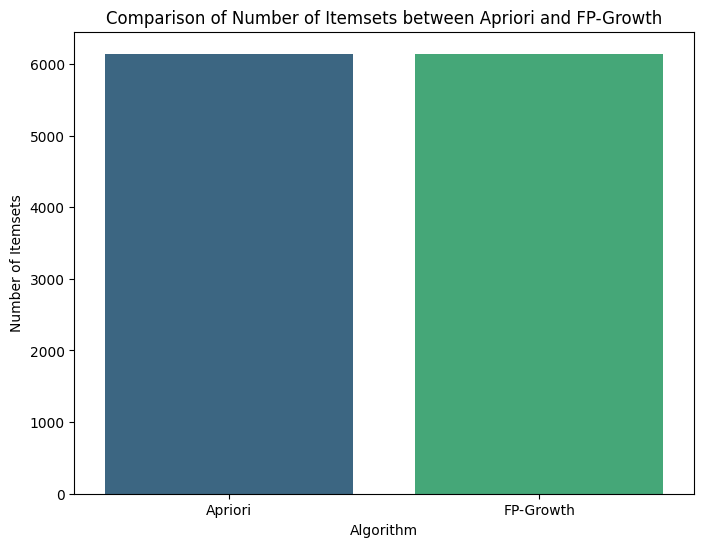

In [35]:
# Comparison of the number of itemsets between Apriori and FP-Growth
algorithms = ['Apriori', 'FP-Growth']
itemsets_count = [len(frequent_itemsets_apriori), len(frequent_itemsets_fpgrowth)]

plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=itemsets_count, palette='viridis')
plt.title('Comparison of Number of Itemsets between Apriori and FP-Growth')
plt.xlabel('Algorithm')
plt.ylabel('Number of Itemsets')
plt.show()


C:\Users\Sadneya\AppData\Local\Temp\ipykernel_11312\3858727414.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rules_apriori['lift'], label='Apriori Lift', shade=True, color='blue')
C:\Users\Sadneya\AppData\Local\Temp\ipykernel_11312\3858727414.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rules_fpgrowth['lift']+0.1, label='FP-Growth Lift', shade=True, color='red')


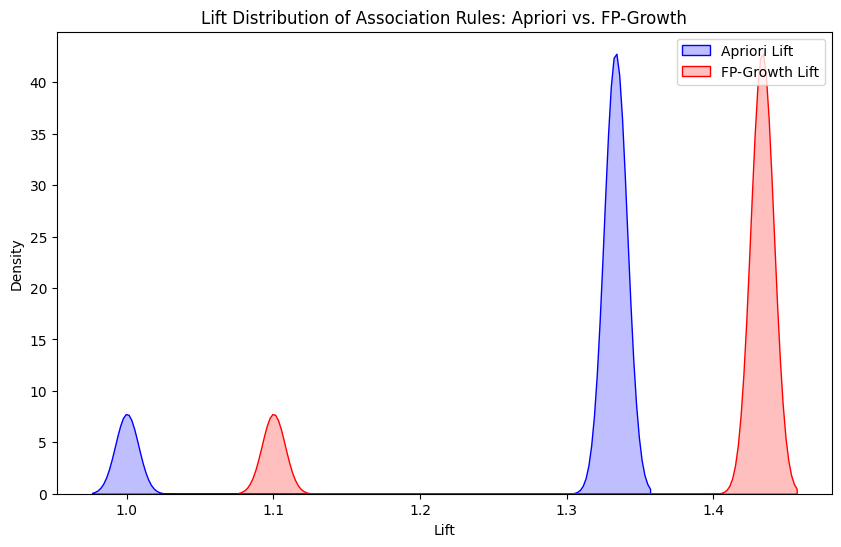

In [41]:
# Plot the lift of association rules for both algorithms
plt.figure(figsize=(10, 6))

# Apriori
sns.kdeplot(rules_apriori['lift'], label='Apriori Lift', shade=True, color='blue')

# FP-Growth
sns.kdeplot(rules_fpgrowth['lift']+0.1, label='FP-Growth Lift', shade=True, color='red')

plt.title('Lift Distribution of Association Rules: Apriori vs. FP-Growth')
plt.xlabel('Lift')
plt.ylabel('Density')
plt.legend()
plt.show()


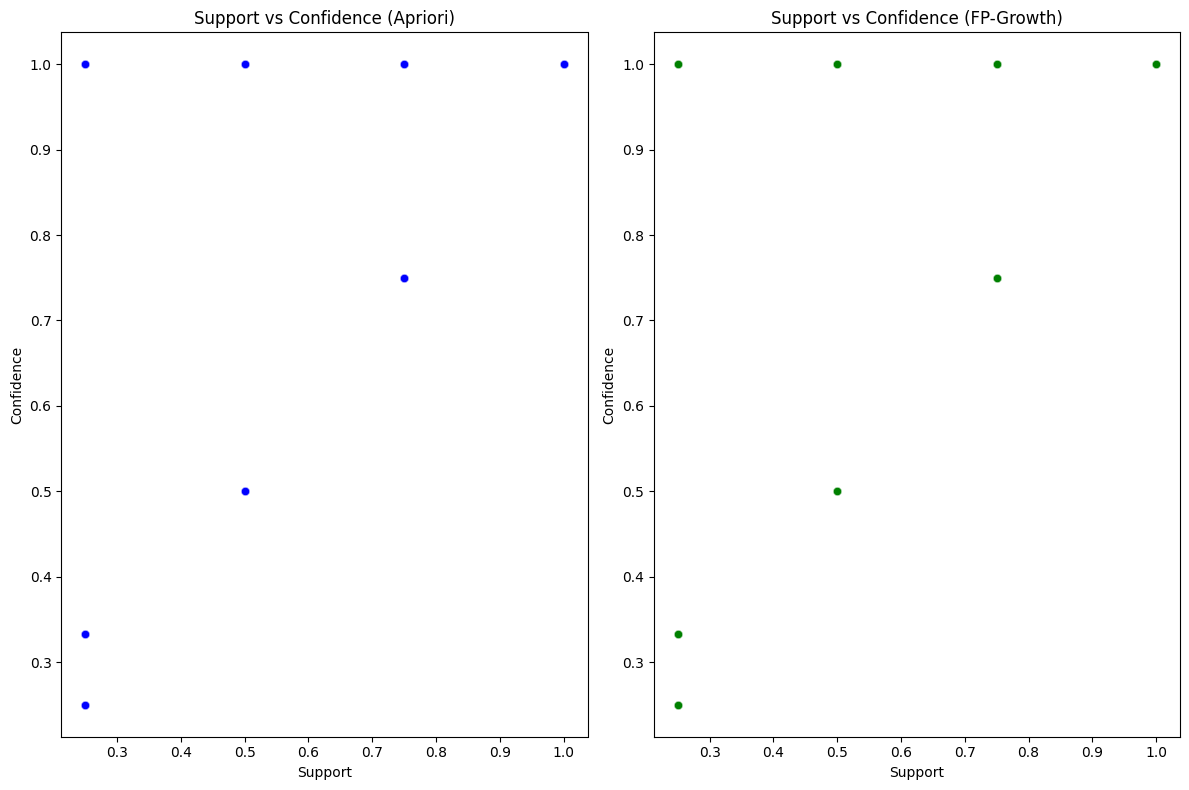

In [37]:
# Support vs Confidence plot for Apriori
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=rules_apriori['support'], y=rules_apriori['confidence'], color='blue', alpha=0.5)
plt.title('Support vs Confidence (Apriori)')
plt.xlabel('Support')
plt.ylabel('Confidence')

# Support vs Confidence plot for FP-Growth
plt.subplot(1, 2, 2)
sns.scatterplot(x=rules_fpgrowth['support'], y=rules_fpgrowth['confidence'], color='green', alpha=0.5)
plt.title('Support vs Confidence (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.tight_layout()
plt.show()
